# Number recognition using keras p-1

In [1]:
#!pip install keras

In [8]:
#!pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.39.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
Processing c:\users\suraj\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-py3-none-any.whl
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
Processing c:\users\suraj\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608\clang-5.0-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
Processing c:\users\suraj\appdata\

### mnist dataset

In [1]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [2]:
(x_train, y_train),(x_test, y_test)= mnist.load_data()

In [3]:
x_test.shape  # 28*28 is the dimention of the images in pixels.

(10000, 28, 28)

In [4]:
y_test.shape

(10000,)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

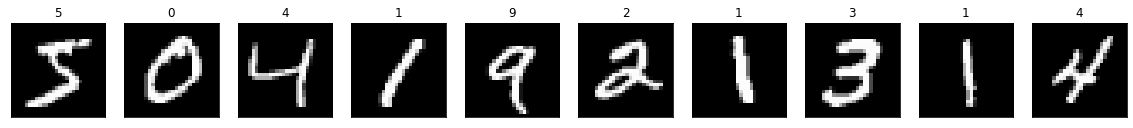

In [22]:
fig, axes= plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [23]:
y_train  # the above numbers

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
y_train= to_categorical(y_train)  # converts the numbers into categorical value having 10 records, like one hot encoder.
y_test= to_categorical(y_test)

In [25]:
y_test.shape

(10000, 10)

In [6]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))  # converts the two dimentional image to one dimentional.
model.add(Dense(10, activation='sigmoid')) # 10 is the no. of neurons in the layer and sigmoid is the activation function.
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [73]:
# in the above, param gives the number of weights and biases. 
# we cannot send all 60000 data as imput at once,so they are send in batches, in above the 'None' defines the default batch size, which is 32. we can change the batch size and it is in the multiple of 2.

In [40]:
#!pip install pydot

In [52]:
#!pip install graphviz

In [65]:
#!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=66a4bcb04ee788ab32bdac5c4b4f8f5e55f3084d6304fd3d440ead5e05cdf003
  Stored in directory: c:\users\suraj\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [62]:
from keras.utils.vis_utils import plot_model

In [68]:
plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [56]:
import tensorflow
tensorflow.keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
history= model.fit(x_train,y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5210 - acc: 0.8628 - val_loss: 0.5164 - val_acc: 0.8600
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5303 - acc: 0.8614 - val_loss: 0.4934 - val_acc: 0.8722
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5399 - acc: 0.8511 - val_loss: 0.5160 - val_acc: 0.8672
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5180 - acc: 0.8627 - val_loss: 0.4734 - val_acc: 0.8770
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5027 - acc: 0.8662 - val_loss: 0.4819 - val_acc: 0.8745
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5183 - acc: 0.8519 - val_loss: 0.5050 - val_acc: 0.8672
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5075 - acc: 0.8659 - val_loss: 0.4879 - val_acc: 0.8748
Epoch 8/20
1875/1875 [==============================] - 5s 2ms

In [8]:
model.fit(x_train,y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.7203 - acc: 0.4367 - val_loss: 1.3300 - val_acc: 0.5581
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1907 - acc: 0.5905 - val_loss: 1.0720 - val_acc: 0.6329
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0097 - acc: 0.6830 - val_loss: 0.9165 - val_acc: 0.7465
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8915 - acc: 0.7568 - val_loss: 0.7953 - val_acc: 0.7967
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8032 - acc: 0.7798 - val_loss: 0.7429 - val_acc: 0.8029
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7400 - acc: 0.8029 - val_loss: 0.7742 - val_acc: 0.7924
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7199 - acc: 0.8046 - val_loss: 0.6654 - val_acc: 0.8200
Epoch 8/20
1875/1875 [==============================] - 4s 2ms

In [74]:
model.save('mnist_model.h5')

# Number recognition using keras p-2

In [26]:
import tensorflow as tf
new_model = tf.keras.models.load_model('mnist_model.h5')

In [15]:
history.history

{'loss': [0.5209944248199463,
  0.5302551984786987,
  0.5398545861244202,
  0.5180158615112305,
  0.5027228593826294,
  0.5182965397834778,
  0.5074951648712158,
  0.4923950135707855,
  0.49619585275650024,
  0.4810670018196106,
  0.48827385902404785,
  0.47987818717956543,
  0.4827442169189453,
  0.4662676751613617,
  0.4743218719959259,
  0.4702134132385254,
  0.47296422719955444,
  0.4586859345436096,
  0.450788676738739,
  0.45685073733329773],
 'acc': [0.8628166913986206,
  0.8613666892051697,
  0.8511166572570801,
  0.862666666507721,
  0.866183340549469,
  0.8518666625022888,
  0.865933358669281,
  0.8702166676521301,
  0.8674666881561279,
  0.8733833432197571,
  0.8686166405677795,
  0.8712833523750305,
  0.8741166591644287,
  0.8746166825294495,
  0.871150016784668,
  0.8733500242233276,
  0.8719333410263062,
  0.8786500096321106,
  0.8815333247184753,
  0.875083327293396],
 'val_loss': [0.5164383053779602,
  0.49339228868484497,
  0.515966534614563,
  0.4733771085739136,
  0.

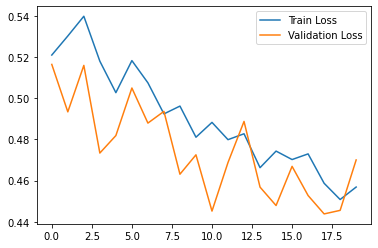

In [31]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

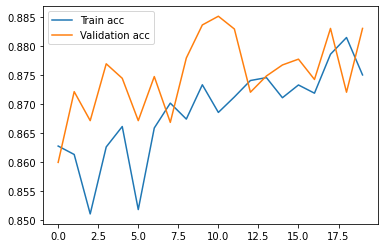

In [20]:
plt.plot(history.history['acc'], label='Train acc')
plt.plot(history.history['val_acc'], label='Validation acc')
plt.legend()

the above graphs are to check if model is overfitting or underfitting. if both lines are close to each other most of the time, then no under or over fitting. 

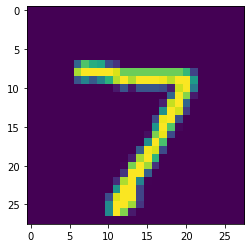

In [21]:
plt.imshow(x_test[0])

We are using imshow not plot, because plot shows only graphs not images.

### Predicting

In [24]:
import numpy as np

In [22]:
x_test[0].shape

(28, 28)

In [27]:
x= np.reshape(x_test[0],(1,28,28)) # 1 is the number of input.
np.argmax(new_model.predict(x))

7

In [29]:
new_model.predict(x)

array([[2.9048702e-05, 1.1663429e-05, 2.0724587e-02, 2.2516693e-03,
        2.9430050e-05, 2.2496829e-06, 6.8096829e-06, 9.7585946e-01,
        1.3454734e-05, 1.0715929e-03]], dtype=float32)

above we can see that we are using argmax to predict. as we can see directly predicting gives us the probability of all the numbers.

In [32]:
tf.__version__

'2.6.0'